# Customer Personality Analysis Segmentation (Clustering)

## 1. Define the problem

### 1.1 Introduction

Problem Statement
Customer Personality Analysis is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers.

Customer personality analysis helps a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.


The most important part of a customer personality analysis is getting the answers to questions such as : 

    1. What people say about your product : What gives customers' attitude towards the product 
    
    2. What people do : which reveals what people are doing rather than what they are saying about your product 

### 1.2 Dataset Feature
**People**

* ID: Customer's unique identifier
* Year_Birth: Customer's birth year
* Education: Customer's education level
* Marital_Status: Customer's marital status
* Income: Customer's yearly household income
* Kidhome: Number of children in customer's household
* Teenhome: Number of teenagers in customer's household
* Dt_Customer: Date of customer's enrollment with the company
* Recency: Number of days since customer's last purchase
* Complain: 1 if the customer complained in the last 2 years, 0 otherwise

**Products:**

* MntWines: Amount spent on wine in last 2 years
* MntFruits: Amount spent on fruits in last 2 years
* MntMeatProducts: Amount spent on meat in last 2 years
* MntFishProducts: Amount spent on fish in last 2 years
* MntSweetProducts: Amount spent on sweets in last 2 years
* MntGoldProds: Amount spent on gold in last 2 years

**Promotion:**

* NumDealsPurchases: Number of purchases made with a discount
* AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
* AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
* AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
* AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
* AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
* Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

**Place:** 

* NumWebPurchases: Number of purchases made through the company’s website
* NumCatalogPurchases: Number of purchases made using a catalogue
* NumStorePurchases: Number of purchases made directly in stores
* NumWebVisitsMonth: Number of visits to company’s website in the last month

## 2. EDA

### 2.1  Import libraries and load the data

In [1]:
import pandas as pd
import numpy as np
from datetime import time
from datetime import datetime
# For visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
# For clustering
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.cluster import KMeans

In [2]:
# Set to view all columns
pd.set_option('display.max_columns' , None)

# Convert the csv file and separate by their delimiter
data = pd.read_csv('marketing_campaign.csv' , header = 0 , delimiter = ';')
data.head(10)


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
5,7446,1967,Master,Together,62513.0,0,1,2013-09-09,16,520,42,98,0,42,14,2,6,4,10,6,0,0,0,0,0,0,3,11,0
6,965,1971,Graduation,Divorced,55635.0,0,1,2012-11-13,34,235,65,164,50,49,27,4,7,3,7,6,0,0,0,0,0,0,3,11,0
7,6177,1985,PhD,Married,33454.0,1,0,2013-05-08,32,76,10,56,3,1,23,2,4,0,4,8,0,0,0,0,0,0,3,11,0
8,4855,1974,PhD,Together,30351.0,1,0,2013-06-06,19,14,0,24,3,3,2,1,3,0,2,9,0,0,0,0,0,0,3,11,1
9,5899,1950,PhD,Together,5648.0,1,1,2014-03-13,68,28,0,6,1,1,13,1,1,0,0,20,1,0,0,0,0,0,3,11,0


### 2.2  Data exploration

In [3]:
data.shape

(2240, 29)

This dataframe has 2240 rows and 33 columns

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [5]:
data.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


Based on the above , the mean income is **52247.25**. The range of salary is from **1730.00 - 666666.00**

As for the total expenses, the mean is **605.80**. The range of total expenses is between **5.00 - 2525**

In [6]:
data['Education'].unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

In [7]:
data['Marital_Status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

### 2.2 Clean data

#### 2.2.1 Remove null and redundant data

In [8]:
#To ensure no redundant data
data['ID'].nunique()

2240

In [9]:
# Function that return Null values by colums

def findNullValuesByColumn (df : pd.DataFrame) :
    temp = df.isnull().sum().sort_values(ascending = False)
    missingDF = pd.DataFrame(temp.loc[temp > 0])
    missingDF.columns = ["Missing"]
    return missingDF

findNullValuesByColumn(data)

,Missing
Income,24


In [10]:
data[data.isnull().any(axis =1)]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
10,1994,1983,Graduation,Married,NaN,1,0,2013-11-15,11,5,5,6,0,2,1,1,1,0,2,7,0,0,0,0,0,0,3,11,0
27,5255,1986,Graduation,Single,NaN,1,0,2013-02-20,19,5,1,3,3,263,362,0,27,0,0,1,0,0,0,0,0,0,3,11,0
43,7281,1959,PhD,Single,NaN,0,0,2013-11-05,80,81,11,50,3,2,39,1,1,3,4,2,0,0,0,0,0,0,3,11,0
48,7244,1951,Graduation,Single,NaN,2,1,2014-01-01,96,48,5,48,6,10,7,3,2,1,4,6,0,0,0,0,0,0,3,11,0
58,8557,1982,Graduation,Single,NaN,1,0,2013-06-17,57,11,3,22,2,2,6,2,2,0,3,6,0,0,0,0,0,0,3,11,0
71,10629,1973,2n Cycle,Married,NaN,1,0,2012-09-14,25,25,3,43,17,4,17,3,3,0,3,8,0,0,0,0,0,0,3,11,0
90,8996,1957,PhD,Married,NaN,2,1,2012-11-19,4,230,42,192,49,37,53,12,7,2,8,9,0,0,0,0,0,0,3,11,0
91,9235,1957,Graduation,Single,NaN,1,1,2014-05-27,45,7,0,8,2,0,1,1,1,0,2,7,0,0,0,0,0,0,3,11,0
92,5798,1973,Master,Together,NaN,0,0,2013-11-23,87,445,37,359,98,28,18,1,2,4,8,1,0,0,0,0,0,0,3,11,0
128,8268,1961,PhD,Married,NaN,0,1,2013-07-11,23,352,0,27,10,0,15,3,6,1,7,6,0,0,0,0,0,0,3,11,0


Since the null value os only in 'Income' column and it can affect the whole number. All rows with null value will be removed.

In [11]:
data.dropna(inplace=True)
data.shape

(2216, 29)

#### 2.2.2.2 Remove the outliers

<Axes: >

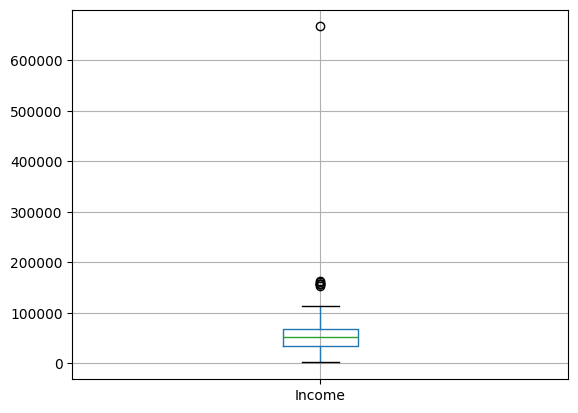

In [12]:
data.boxplot(column= 'Income')

In [13]:
data = data.loc[data.Income < data.Income.max()]
sns.histplot(data.Income)

<Axes: xlabel='Income', ylabel='Count'>

## 2. Data Preparation 


### 2.1 Create new dataframes

In [14]:

# Create column for age
today = datetime.today().year
data['Age'] = (today - data['Year_Birth'])
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'] )

#Create column for number of children
data['Children'] = data['Kidhome'] + data['Teenhome']


# Change Education , Marital_Status into mapping

# Dataframe People
people_columns = ['ID' , 'Age', 'Education', 'Marital_Status' ,'Children' , 'Income' ,'Recency' , 'Complain' ]
people_df = data[people_columns]
people_df.head(10)


,ID,Age,Education,Marital_Status,Children,Income,Recency,Complain
0,5524,67,Graduation,Single,0,58138.0,58,0
1,2174,70,Graduation,Single,2,46344.0,38,0
2,4141,59,Graduation,Together,0,71613.0,26,0
3,6182,40,Graduation,Together,1,26646.0,26,0
4,5324,43,PhD,Married,1,58293.0,94,0
5,7446,57,Master,Together,1,62513.0,16,0
6,965,53,Graduation,Divorced,1,55635.0,34,0
7,6177,39,PhD,Married,1,33454.0,32,0
8,4855,50,PhD,Together,1,30351.0,19,0
9,5899,74,PhD,Together,2,5648.0,68,0


All age will be grouped into three different age groups : 'Young Adult' , 'Adult' and 'Elder'. This is to analyze the purchase pattern 

In [15]:
# Grouping age into age group
def age_group(age) :
    if 18 <= age <= 35 : 
        return 'Young Adult'
    elif 36 <= age <= 55 : 
        return 'Adult'
    else : 
        return 'Elder'

data['Age_Group'] = data['Age'].apply(age_group)
data['Age_Group'] = pd.Categorical(data.Age_Group, categories=['Young Adult', 'Adult','Elder'])
data.head(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Children,Age_Group
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,67,0,Elder
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,70,2,Elder
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,59,0,Elder
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,40,1,Adult
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,43,1,Adult


## 3. Visualization

In [16]:
plt.figure(figsize=(11,14) , facecolor= 'Yellow')
data['Age'].value_counts().sort_index(ascending = False).plot(kind = 'barh')
plt.title ('Customer Age')

Text(0.5, 1.0, 'Customer Age')

From the above, most customer at the age 58.  Most customers come from range 45 - 58. 

In [17]:
plt.figure(figsize= (10 , 10 ),  facecolor= 'lightyellow')
sns.set(style = 'whitegrid')
ax = sns.histplot(data = data, x = 'Income' , binwidth = 10000, kde = True)
ax.set_title(' Income')

Text(0.5, 1.0, ' Income')

From the graph , we can observe that most customers have the income range from 30,000 - 80,000

In [18]:
plt.title ('Number of Marital Status')
sns.histplot(data.Marital_Status)
plt.xticks(rotation = 90)
plt.tight_layout(pad = 2)

data.Marital_Status.unique()
'''array(['Single' , 'Together' , 'Married' , 'Divorced', 'Widow' , 'Alone', 'Absurd' , 'YOLO'] , dtype = object)'''


"array(['Single' , 'Together' , 'Married' , 'Divorced', 'Widow' , 'Alone', 'Absurd' , 'YOLO'] , dtype = object)"

In [19]:
plt.Figure(figsize=(10 , 10))
ax = data[['MntWines' , 'MntFruits']]

In [20]:
To_Plot = ['Income', 'Recency' , 'Cust']

**Observations** : From the plots above , it is clear that there  are some outliers in the income and age features. These outliers may have a negative impact on the accuracy of our analysis, so I will remove them from the data. This will help to ensure that our results are more accurate and reliable

In [21]:
plt.figure(figsize= (13,8))
sns.scatterplot(x = data [data['Income'] < 600000]['Total_Expenses'] , y = data[data['Income'] < 6000000]['Income'] ,   color = 'magenta')

KeyError: 'Total_Expenses'

In [ ]:
# To view the relationship between income and total amount spent 

fig = px.scatter(data_frame= data , x = 'Income',
                 y = 'Total_Expenses',
                 title = 'Relationship between customer income and total amount spent',
                 height = 500,
                 color_discrete_sequence = px.colors.qualitative.G10[1:])

fig.show()

In [ ]:
sns.heatmap(data[all].corr() , annot = True)

So from the diagram above, there is a correlation between income, total expenses, age, total accepted campaign and recency. The highest correlation is income and total expenses which is 0.67. Followed by total expenses and total accepted campaign which is 0

In [ ]:
#Plotting following features 

To_Plot = ['Income', 'Recency' ]

So from the heatmap,  there is a correlation between income, total_expenses , age, total_Acc_cmp and recency

## 3. Preprocessing

1. Use label encoding to convert the categorical features into numeric form 
2. Scale the features using the standard scaler to ensure that they are on the same scale
3. Create a subset dataframe for dimensionality reduction to reduce the number of features and improve the efficiency of our analysis


In [ ]:
#Get list of categorical variables
#Encode  categorical data
encode = LabelEncoder()
data['Education'] = encode.fit_transform(data['Education'])
data['Marital_Status'] = encode.fit_transform(data['Marital_Status'])
data